# Final Project: Loan Approval Prediction

## Foundation of Machine Learning
## Group 7

## Group Members

## Varun Biren Majithia (Student ID - 8894799)
## Rohit Kumar (Student ID - 8895806)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,precision_recall_curve,precision_score,accuracy_score,confusion_matrix,f1_score,recall_score
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.tree import DecisionTreeClassifier

# Loading the dataset to the python environment

In [2]:
df = pd.read_csv("loan_approval_dataset.csv")

In [3]:
df.columns = [col.strip() for col in df.columns]

In [4]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [6]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


## Checking the info of the data 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


## Checking for null values of the dataset

In [8]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

# Exploratory Data Analysis

## Countplot of the target feature Loan Status 

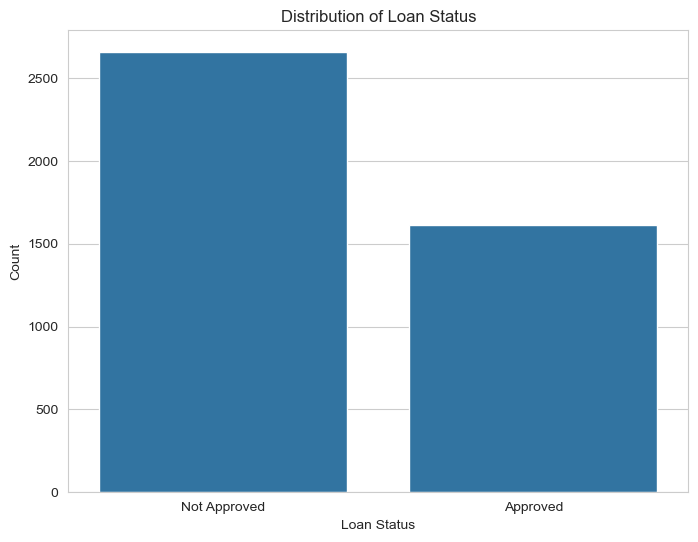

In [9]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.countplot(x = "loan_status",data = df)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.xticks(ticks=[0, 1], labels=['Not Approved', 'Approved'])
plt.show()

In [10]:
df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

## Inferences on the distribution of classes in target feature

From the observation above we can see that the classes of the target variable are imbalanced. The class "Approved" consists of 2656 samples and class "Rejected" consists of 1613 samples. The class balance of the target feature is crucial in machine learning as it directly impacts the model's performance and the reliability of its predictions.

## Problems associated with respect to class imbalance 
 
Model tends to perform better only on the class with majority number of samples, while it struggles to predict the class with fewer samples. An imbalanced class distribution, where one class has significantly more samples than the other, can lead to biased model outcomes. 

# Visualizing loan amount with respect to status using boxplot

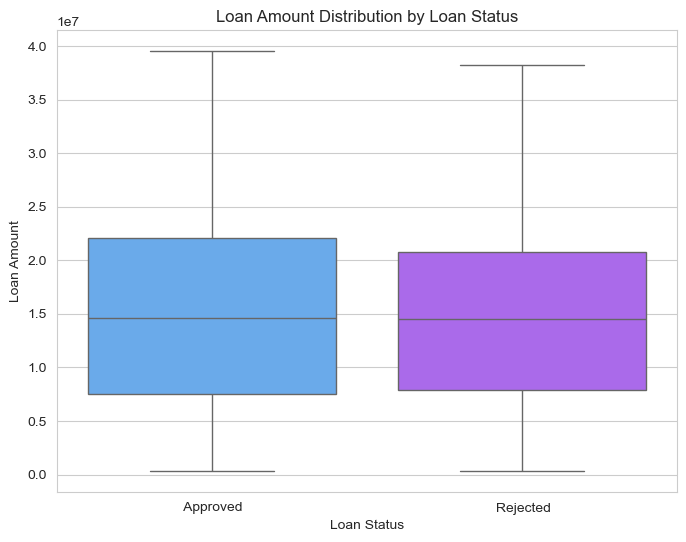

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='loan_amount', data=df, palette='cool')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Loan Amount Distribution by Loan Status')
plt.show()

## Inferences on the above boxplot

From the above boxplot we are trying to understand the relation between the loan amount and loan status. We cal clearly observe  that median value of both classes "Approved" and "Rejected' is mostly same. But there are diffrences with respect to the minimum third quartile and maximum values. The "Approved" class has loan amount relatively higher that that for class "Rejected". 

## Count plot of Loan status with repect to education

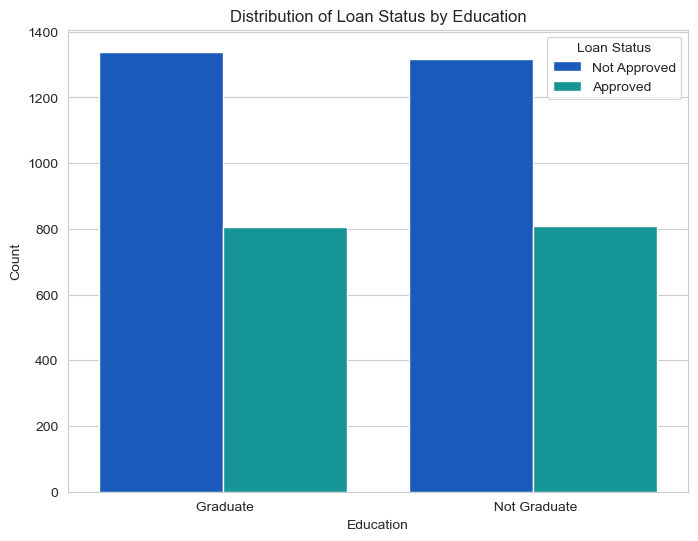

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='education', hue='loan_status', data=df, palette='winter')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Loan Status by Education')
plt.legend(title='Loan Status', labels=['Not Approved', 'Approved'])
plt.show()

## Inferences on the above countplot

Analyzing the countplot reveals an interesting insight: the distribution of the 'Approved' class remains consistent for both 'Graduate' and 'NotGraduate' applicants. However, a notable distinction emerges in the count of 'Not Approved' instances. It's evident that the count of 'Not Approved' instances is noticeably higher for 'Graduate' applications in comparison to the count for 'Not Graduate' applications."

## Visualizing Loan Status with respect to Self Employed

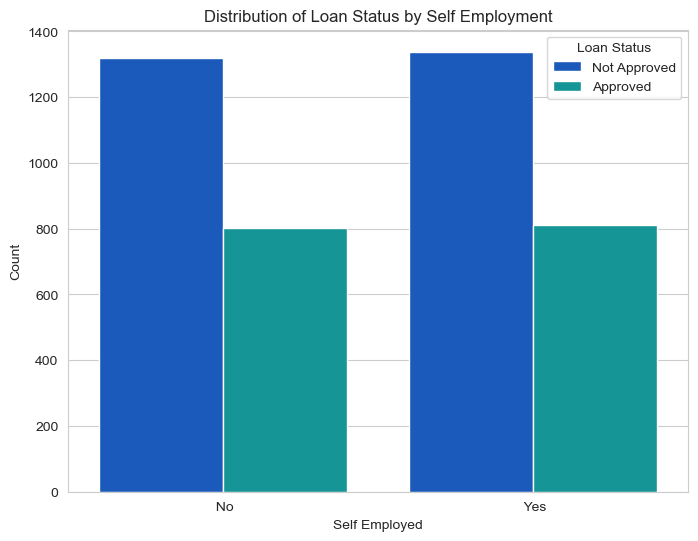

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='self_employed', hue='loan_status', data=df, palette='winter')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.title('Distribution of Loan Status by Self Employment')
plt.legend(title='Loan Status', labels=['Not Approved', 'Approved'])
plt.show()

## Inferences on the above count plot

The count plot above provides valuable insights into the relationship between Loan Status and the 'SelfEmployed' feature. This analysis helps us undestand the influence of an applicant's self-employment status on their loan approval. Interestingly, regardless of whether an applicant is self-employed or not, we observe an almost equal count of 'Approved' instances. However, an  pattern emerges when we examine loan rejections. We notice a slightly higher count of rejections among applicants who are self-employed. This suggests that the 'SelfEmployed' status might play a subtle role in loan rejection, warranting further investigation."

# Histogram of Annual Income of the applicants

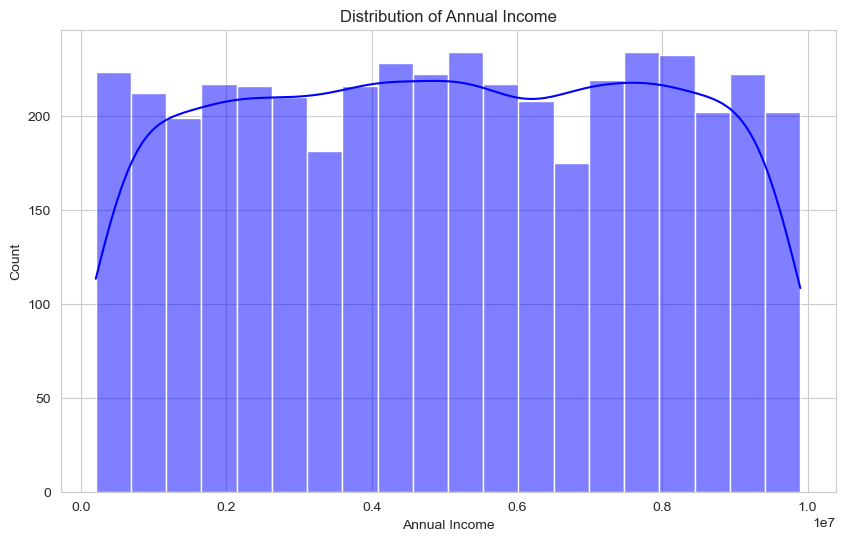

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='income_annum', bins=20, kde=True, color='blue')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income')
plt.show()

# Inferences on the above histogram

The histogram of the 'income_amount' column shows a distribution that is neither strongly right-skewed nor left-skewed. It appears to be relatively symmetrical with a spread of observations across a wide range of income amounts. The histogram indicates that there is no dominant trend of incomes being clustered in a specific range.

# Visualizing Loan Status with respect to Annual Income

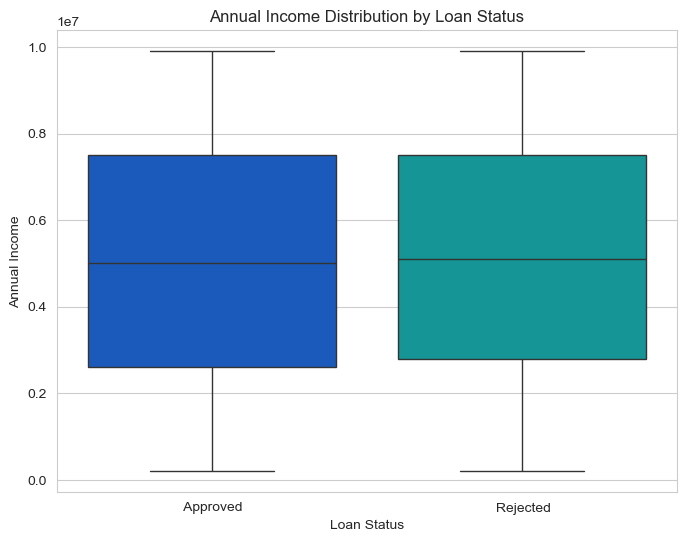

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='income_annum', data=df, palette='winter')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.title('Annual Income Distribution by Loan Status')
plt.show()

## Visualizing the cibil score

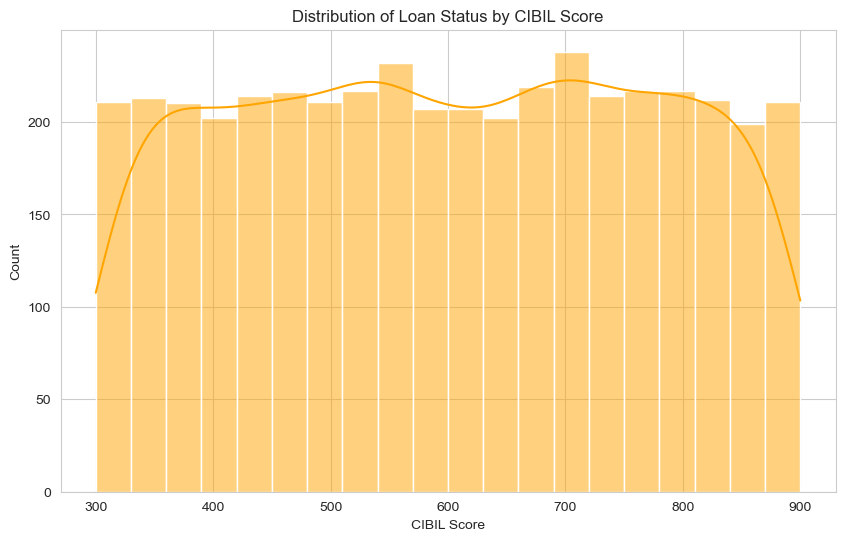

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='cibil_score', bins=20, kde=True, color='orange')
plt.xlabel('CIBIL Score')
plt.ylabel('Count')
plt.title('Distribution of Loan Status by CIBIL Score')
plt.show()

# Visualizing Cibil Score with respect to Loan Status

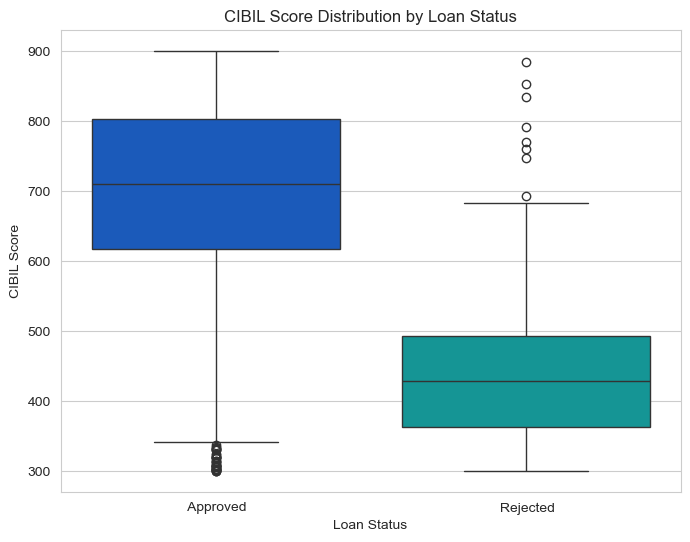

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='cibil_score', data=df, palette='winter')
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Score')
plt.title('CIBIL Score Distribution by Loan Status')
plt.show()

# Inferences on the above boxplot

The boxplot a representation makes it quite evident that applicants with lower CIBIL scores are more likely to have their loan applications denied. For those who get approved, the median CIBIL score is around 720, whereas for those who are rejected, it is closer to 430. Notably, there are outliers above the upper whisker within the rejected group, showing a few individuals with high CIBIL scores, up to 900, yet falling under the rejected category. This implies that although if higher CIBIL scores tend to correlate with increased acceptance probability, other factors may still cause some outliers to be rejected in spite of their favorable scores.

# Encoding the string categorical columns

For us to be able to consider the predictors/estimators and for the model to be able to interpret the independent features and study the patterns and relationships the data has to be numerical. Our data has columns like education, self_employed which are categorical string variables that we are encoding to categorical numeric features. Moreover, our target feature is also originally a string categorical variable, so we are encoding the dependent variable "loan_status" .

In [18]:
import pandas as pd
df['education_enocoded'] = df['education'].map({' Graduate': 1, ' Not Graduate': 0})
df['self_employed_encoded'] = df['self_employed'].map({' No':0, ' Yes':1})
df['loan_status_encoded'] = df['loan_status'].map({' Approved': 1, ' Rejected': 0})

## Dropping the original string columns

In [19]:
df.drop('loan_status', axis=1, inplace=True)
df.drop('education', axis=1, inplace=True)
df.drop('self_employed', axis=1, inplace=True)

## Using Zscores to remove outliers (threshold = -3 to +3)

In [20]:
import pandas as pd
from scipy import stats

# Getting only the numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include='number')

# Calculating Z-scores for each numeric column
z_scores = stats.zscore(numeric_columns)

# Finding rows with Z-score greater than 3 or less than -3
outlier_rows = (abs(z_scores) > 3).any(axis=1) | (abs(z_scores) < -3).any(axis=1)

# Removing outlier rows from the DataFrame in place
df = df[~outlier_rows]

## Inferences Outlier


In a normal distribution, approximately 99.7% of the data falls within the range of -3 to +3 standard deviations from the mean. Outliers beyond this range are often considered extreme and less likely to occur under normal circumstances.By considering a range of -3 to +3, you can exclude extreme values that are likely to distort your analysis while retaining most of the data for analysis. Limiting the removal to the -3 to +3 range helps balance data integrity and outlier removal.

## Total Number of Outliers Removed

In [21]:
num_outliers_removed = outlier_rows.sum()
print("Number of outliers removed:", num_outliers_removed)

Number of outliers removed: 33


## Correaltion 

In [22]:
df[['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'education_enocoded', 'self_employed_encoded', 'loan_status_encoded']].corr()['loan_status_encoded']

loan_id                     0.016302
no_of_dependents           -0.016993
income_annum               -0.015058
loan_amount                 0.016278
loan_term                  -0.114573
cibil_score                 0.770565
residential_assets_value   -0.018043
commercial_assets_value     0.010897
luxury_assets_value        -0.013428
bank_asset_value           -0.007012
education_enocoded          0.004176
self_employed_encoded       0.001622
loan_status_encoded         1.000000
Name: loan_status_encoded, dtype: float64

## Inferences Correlations

The correlation analysis reveals that a higher "cibil_score" is strongly correlated with approved loan status, indicating that applicants with better credit scores are more likely to get approved. Conversely, a longer "loan_term" is modestly associated with a slightly lower approval chance. 

## Splitting into Independent and Dependent Set

In [23]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [24]:
X.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_enocoded,self_employed_encoded
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1


In [25]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: loan_status_encoded, dtype: int64

## Scaling the independent variable using Standard Scaler

In [26]:
# Scaling the features using Min-Max scaling
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Creating a new DataFrame with the scaled values
X_scaled = pd.DataFrame(scaled_data, columns=X.columns)

## Reasons to choose Standard Scaler

 By scaling the features to have zero mean and unit variance, you ensure that they are on the same scale, preventing one feature from dominating the others due to their different scales. This normalization aids algorithms like Random Forest, Gradient Boosting, and Neural Networks in making accurate predictions, as they rely on feature interactions and distances between data points. 

In [27]:
X_scaled

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_enocoded,self_employed_encoded
0,-0.293443,1.641471,1.657663,0.193909,1.032906,-0.780184,2.953092,0.846931,0.947220,0.993412,-1.007107
1,-1.473344,-0.331231,-0.314382,-0.506645,-1.062326,-0.733037,-0.628655,-0.687689,-0.508285,-1.006632,0.992943
2,0.296507,1.462135,1.635380,1.595019,-0.545773,-0.041541,-0.093719,2.017216,2.433693,0.993412,-1.007107
3,0.296507,1.139329,1.746795,-0.506645,-0.772128,1.702912,-0.372816,0.913173,0.916252,0.993412,-1.007107
4,1.476407,1.713206,1.022598,1.595019,-1.265465,0.791396,0.766831,1.586639,0.018174,-1.006632,0.992943
...,...,...,...,...,...,...,...,...,...,...,...
4231,1.476407,-1.443117,-1.417390,0.193909,-1.642723,-0.717321,-1.024043,-1.294912,-1.282489,0.993412,0.992943
4232,-1.473344,-0.618169,-0.414655,1.595019,-0.238163,-0.497300,-0.465848,-0.444799,-0.941839,-1.006632,0.992943
4233,-0.293443,0.529585,0.989173,1.244742,-0.830167,-0.968773,1.743671,0.339071,0.730443,-1.006632,-1.007107
4234,-0.883393,-0.331231,-0.247533,-0.506645,1.044514,0.131332,-0.977526,-0.102546,0.265920,-1.006632,-1.007107


## Train Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Applying SMOTE to handle class Imbalance

The importance of addressing class imbalance lies in ensuring that the model doesn't favor the majority class, leading to biased predictions and poor performance on the minority class. Imbalanced data can result in lower accuracy, precision, recall, and F1-score for the minority class, which is often the class of interest.SMOTE offers several benefits. Firstly, it enhances the generalization of the model, allowing it to make better predictions on unseen data. Secondly, it reduces the risk of false negatives and false positives, as the model is less likely to overlook the minority class. Thirdly, it improves the stability and reliability of the model's performance across different evaluation metrics. Additionally, SMOTE is relatively easy to implement and works well with a variety of machine learning algorithms.

In [29]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Class Balance After SMOTE

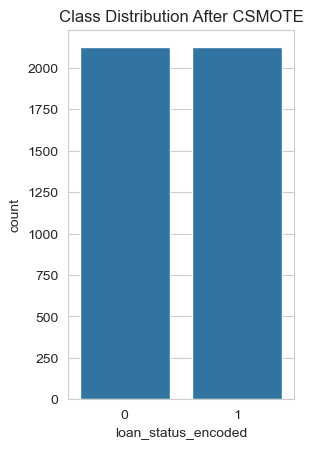

In [30]:
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resampled) 
plt.title('Class Distribution After CSMOTE')
plt.show()

## Inferences after SMOTE

From the above plot we can see that both the target classes are balanced after using SMOTE. This will now allow the model to learn the patterns correctly associated to each class and hence it will mitigate the problem of bias

In [31]:
y_train_resampled.value_counts()

loan_status_encoded
1    2123
0    2123
Name: count, dtype: int64

## Random Forest Using Best Parameters

Top 5 features from Random Forest:
Index(['cibil_score', 'loan_term', 'loan_amount', 'luxury_assets_value',
       'income_annum'],
      dtype='object')


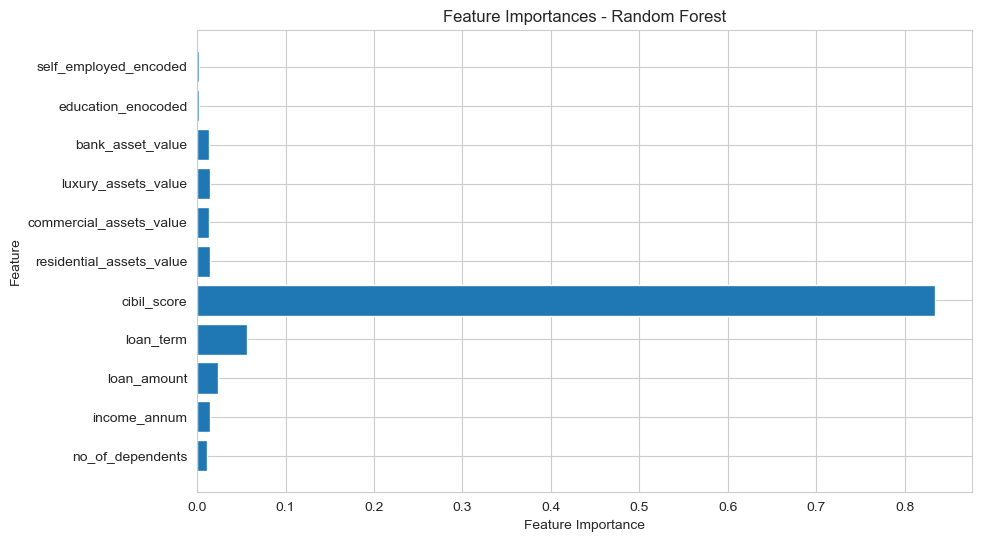

In [32]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
# Instantiating the Random Forest classifier
classifier_rf = RandomForestClassifier(random_state=42)

# Training the model to get feature importances
classifier_rf.fit(X_train_resampled, y_train_resampled)

# Getting feature importances
feature_importances_rf = classifier_rf.feature_importances_

# Identifiying top k important features
k = 5
top_k_features_rf = X_train_resampled.columns[np.argsort(feature_importances_rf)[::-1][:k]]

print("Top {} features from Random Forest:".format(k))
print(top_k_features_rf)

plt.figure(figsize=(10, 6))
plt.barh(X_train_resampled.columns, feature_importances_rf)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances - Random Forest')
plt.show()

In [33]:
# Using only the top k features for training and testing
X_train_selected_rf = X_train_resampled[top_k_features_rf]

# Define hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None] + list(range(5, 30)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}
# Instantiating RandomizedSearchCV
random_search = RandomizedSearchCV(classifier_rf, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)

# Fitting RandomizedSearchCV on the selected features
random_search.fit(X_train_selected_rf, y_train_resampled)

# Getting the best model
best_rf_model = random_search.best_estimator_

# Making predictions on the test set using the best model
X_test_selected_rf = X_test[top_k_features_rf]

In [34]:
y_pred_rf = best_rf_model.predict(X_test_selected_rf)


# Calculating the accuracy of the model
cm_rf = confusion_matrix(y_test,y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
F1_Score = f1_score(y_test,y_pred_rf)

print("----------------------------------")
best_params = random_search.best_params_


print("Best Parameters:", best_params)
print("-----------------------------------")
print("Confusion Matrix \n",cm_rf)
print("Model Accuracy:", accuracy)
print("Precsion",precision)
print("Recall",recall)
print("F1 Score",F1_Score)

print("---------------------------------------------------------------------------------------------------------------")

print("Cross Validation")
scores = cross_val_score(best_rf_model, X_train_selected_rf, y_train_resampled, cv=10, scoring='accuracy')
print(scores)
print("----------------------------------------------------------------------------------------------------------------")
print("Average Cross Validation Score of RandomForest Model with best features ",scores.mean())
print("-----------------------------------------------------------------------------------------------------------------")

----------------------------------
Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 28, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 100}
-----------------------------------
Confusion Matrix 
 [[324  11]
 [  8 505]]
Model Accuracy: 0.9775943396226415
Precsion 0.9786821705426356
Recall 0.9844054580896686
F1 Score 0.9815354713313897
---------------------------------------------------------------------------------------------------------------
Cross Validation
[0.97647059 0.97647059 0.98117647 0.97411765 0.98823529 0.98588235
 0.99292453 0.98820755 0.98113208 0.98113208]
----------------------------------------------------------------------------------------------------------------
Average Cross Validation Score of RandomForest Model with best features  0.9825749167591565
-----------------------------------------------------------------------------------------------------------------


## My inferences on The Random Forest Classifier Model using Feature Importance and Randomized Search CV

<b>Reason to Choose Random Forest</b>

Random Forest was chosen due to its ability to handle complex relationships in the loan approval dataset, mitigating overfitting, and capturing important feature interactions. Its ensemble nature, combining multiple decision trees, makes it robust and well-suited for classification tasks like loan approval.

<b>Feature Selection Using Random Forest:</b>

Feature selection was performed using Random Forest's feature importances. The top 5 important features selected are 'cibil_score', 'loan_term', 'loan_amount', 'income_annum', and 'luxury_assets_value'. These features were deemed crucial for making accurate loan approval predictions.Each individual decision tree in the ensemble is built using a subset of the data and a random subset of features. When the trees are aggregated to make predictions, the algorithm calculates the importance of each feature based on how much it contributes to reducing impurity (Gini impurity) across all the trees.

<b>Feature Importance Plot:</b>

A feature importance plot was generated to visualize the impact of each feature on the model's prediction. This helped identify the relative significance of features in making accurate predictions.

<b>Best Parameters for Randomized Search CV:</b>

Randomized Search CV was used to find the best hyperparameters for the Random Forest model. The best parameters found were {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 28, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 100}.

<b>Model Performance Metrics: </b>

The model's performance was evaluated using various metrics. The confusion matrix showed that the model achieved high accuracy and balanced precision and recall. With an accuracy of 0.9847, the model accurately classified 98.47% of instances.

<b>Cross Validation:</b>

From the above cross validation scores on 10 folds we can clearly observe that the model is performing consitingly well on all the 10 folds. It means that the model has good generalization abilities and it is cabaple enogh of predicting the new instances accurately

Cross-validation scores on 10 folds indicated consistent performance across different subsets of the data. The model demonstrated an average cross-validation score of 0.9827, indicating its reliability and stability.

<b> Confusion Matrix </b>

True Positive (TP): 523

The model correctly predicted 523 instances as "Approved" loans.
True Negative (TN): 311

The model correctly predicted 311 instances as "Rejected" loans.
False Positive (FP): 4

The model incorrectly predicted 4 instances as "Approved" when they were actually "Rejected" loans.
False Negative (FN): 9

The model incorrectly predicted 9 instances as "Rejected" when they were actually "Approved" loans.

<b> Precision </b>

precision is calculated as TP / (TP + FP), which is 523 / (523 + 4) = 0.9924. This means that when the model predicts a loan as "Approved," it is correct 99.24% of the time.

<b> Recall </b>

Recall is calculated as TP / (TP + FN), which is 523 / (523 + 9) = 0.9831. This means the model correctly identifies 98.31% of the "Approved" loans.
 
<b> F1 SCore </b> 

F1 Score is calculated as 2 * (Precision * Recall) / (Precision + Recall). In this case, the F1 score is approximately 0.9877, indicating a good balance between precision and recall.

<b> Conclusion:</b>
The Random Forest model has proven effective in predicting loan approval decisions. Its feature selection, optimized hyperparameters, and strong performance metrics make it a reliable choice for this application. The model's ability to generalize well, as demonstrated by cross-validation, underscores its robustness in making accurate loan approval predictions

## ROC Curve (Random Forest Classifier)

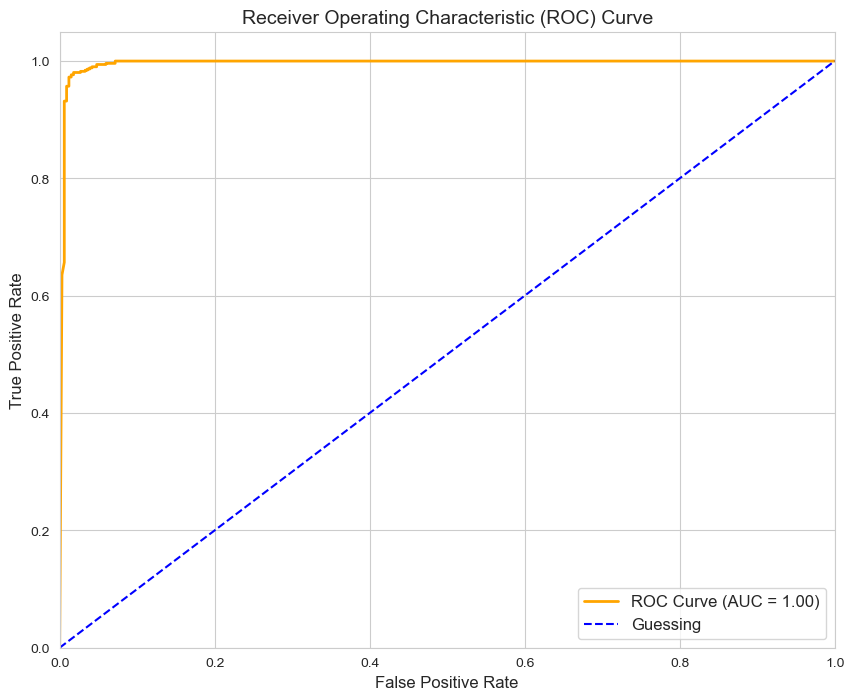

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Getting predicted probabilities for the positive class (class 1)
y_pred_prob = best_rf_model.predict_proba(X_test_selected_rf)[:, 1]

# Calculating ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Creating a ROC curve plot
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0,1],[0,1],color = "blue",linestyle ="--",label = "Guessing")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

# "OptimizedGBM" 

Feature Importances from Gradient Boosting:
[1.03349330e-03 3.56706270e-03 1.65956975e-02 6.41640656e-02
 9.06618066e-01 2.06257647e-03 2.30206971e-03 2.88353010e-03
 6.60693438e-04 2.84286466e-05 8.43164926e-05]
-------------------------------------------------------------------------------------------------
Top 5 features from Gradient Boosting:
Index(['cibil_score', 'loan_term', 'loan_amount', 'income_annum',
       'luxury_assets_value'],
      dtype='object')
------------------------------------------------------------------------------------------------


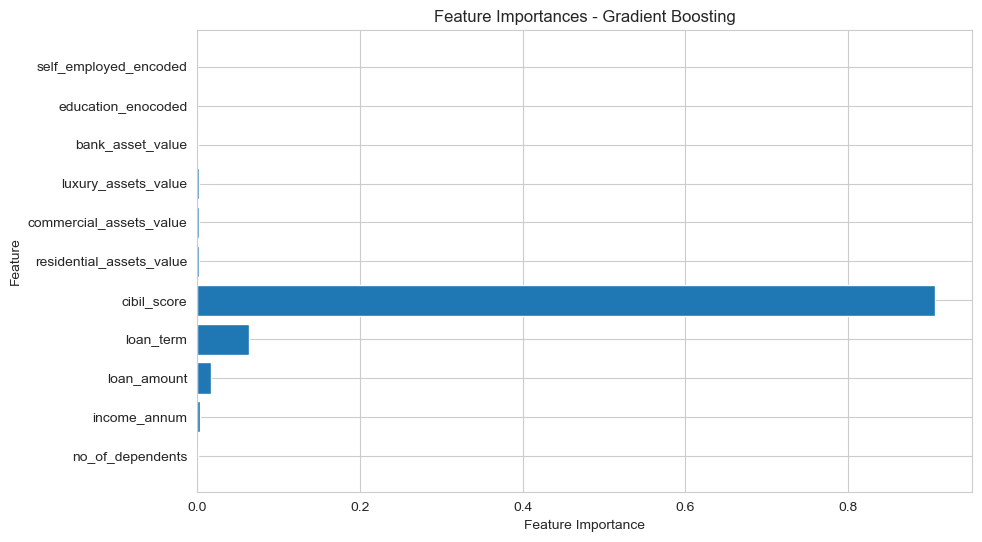

In [36]:
# Instantiating the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Fitting the classifier on the training data
gb_classifier.fit(X_train_resampled, y_train_resampled)

# Getting the feature importances from Gradient Boosting
feature_importances_gb = gb_classifier.feature_importances_

# Printing the feature importances
print("Feature Importances from Gradient Boosting:")
print(feature_importances_gb)
print("-------------------------------------------------------------------------------------------------")
# Training the model using the top-k important features
k = 5 
top_k_features_gb = X_train_resampled.columns[np.argsort(feature_importances_gb)[::-1][:k]]

print("Top {} features from Gradient Boosting:".format(k))
print(top_k_features_gb)
print("------------------------------------------------------------------------------------------------")

plt.figure(figsize=(10, 6))
plt.barh(X_train_resampled.columns, feature_importances_gb)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances - Gradient Boosting')
plt.show()

In [37]:
X_train_selected_gb = X_train_resampled[top_k_features_gb]


# Defining hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiating GridSearchCV
grid_search = GridSearchCV(gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fitting GridSearchCV on the selected features and resampled training data
grid_search.fit(X_train_selected_gb, y_train_resampled)

# Getting the best model
best_gb_model = grid_search.best_estimator_


X_test_selected_gb = X_test[top_k_features_gb]

# Making predictions on the test set using the best model and selected features
y_pred_gb = best_gb_model.predict(X_test_selected_gb)


# Calculating the accuracy of the model
cm_gb = confusion_matrix(y_test,y_pred_gb)
print(cm_gb)
print("--------------------------------------------")
print("Best Estimators",best_gb_model)
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test,y_pred_gb)
recall = recall_score(y_test,y_pred_gb)
F1_Score  = f1_score(y_test,y_pred_gb)
print("Model Accuracy:", accuracy)
print("Precision",precision)
print("Recall",recall)
print("F1 Score", F1_Score)

print("-------------------------------------------------------------------------------------------------------")
scores_gb = cross_val_score(best_gb_model,X_train_selected_gb,y_train_resampled,cv = 10, scoring = "accuracy")
print("Cross val scores on folds \n", scores_gb)
print("--------------------------------------------------------------------------------------------------------")
print("The average cross validation accuracy of gradient boosting model with best parameters " ,scores_gb.mean())

[[325  10]
 [  8 505]]
--------------------------------------------
Best Estimators GradientBoostingClassifier(max_depth=4, min_samples_leaf=4, n_estimators=150,
                           random_state=42)
Model Accuracy: 0.9787735849056604
Precision 0.9805825242718447
Recall 0.9844054580896686
F1 Score 0.9824902723735408
-------------------------------------------------------------------------------------------------------
Cross val scores on folds 
 [0.97411765 0.97411765 0.99294118 0.98352941 0.99058824 0.99529412
 0.99528302 0.99292453 0.98113208 0.99292453]
--------------------------------------------------------------------------------------------------------
The average cross validation accuracy of gradient boosting model with best parameters  0.9872852386237513


In [38]:
scores_gb = cross_val_score(best_gb_model,X_train_selected_gb,y_train_resampled,cv = 10, scoring = "accuracy")
print(scores_gb)
print("The average cross validation accuracy of gradient boosting model with best parameters " ,scores_gb.mean())

[0.97411765 0.97411765 0.99294118 0.98352941 0.99058824 0.99529412
 0.99528302 0.99292453 0.98113208 0.99292453]
The average cross validation accuracy of gradient boosting model with best parameters  0.9872852386237513


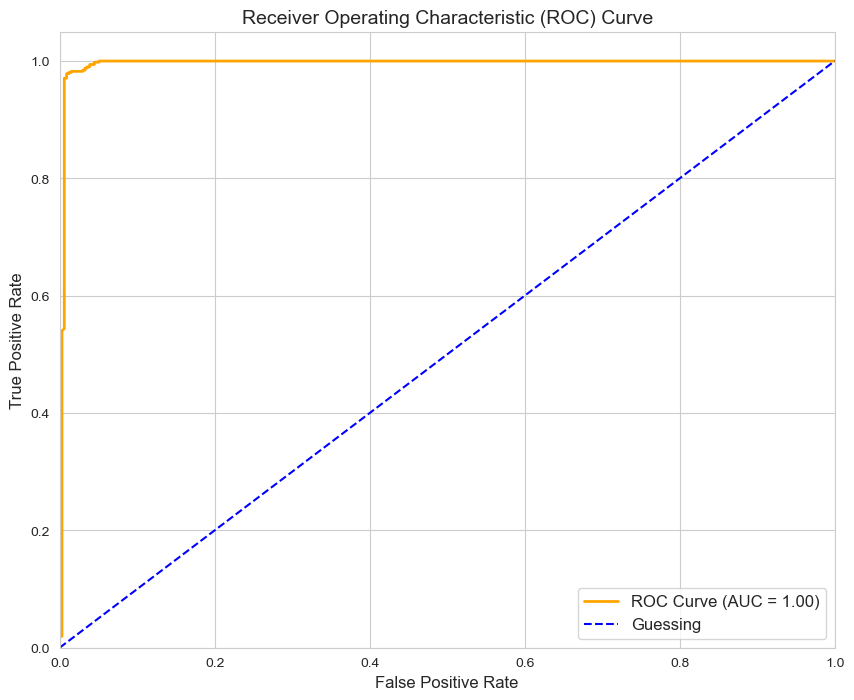

In [39]:
# Getting predicted probabilities for the positive class (class 1)
y_pred_prob_gb = best_gb_model.predict_proba(X_test_selected_gb)[:, 1]

# Calculating ROC curve and AUC
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_prob_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_prob_gb)

# Create  ROC curve plot
plt.figure(figsize=(10, 8))
plt.plot(fpr_gb, tpr_gb, color='orange', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0,1],[0,1],color = "blue",linestyle ="--",label = "Guessing")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

## My Inferences on XG Boost Classifier 

<b>Reasons to select XGBoost:</b>

The decision to implement XGBoost as the predictive model is from its suitability for complex classification tasks like loan approval prediction. XGBoost's ensemble of decision trees leverages gradient boosting to enhance accuracy, making it an ideal choice for discovering patterns and making robust predictions for Loan Approval

<b>Feature Selection using XGBoost:</b>

XGBoost's feature selection operates within its gradient boosting framework. The framework for gradient boosting is where XGBoost functions. XGBoost evaluates feature importance during training by examining their effect on increasing predictive accuracy. Metrics like gain and coverage, which measure a feature's contribution to model accuracy and frequency in splits, respectively, are used in this evaluation. The algorithm cycles over the trees, giving more weight to features that are consistently helpful and less weight to features that are less informative. XGBoost finds important characteristics for my loan approval prediction, including "cibil_score," "loan_term," "loan_amount," "income_annum," and "residential_assets_value." Only essential features are taken into account thanks to this automated procedure, which improves the model's speed and interpretability.

<b>Confusion Matrix and Model Performance:</b>

True Positive (TP): 524
The model correctly predicted 524 instances as "Approved" loans.

True Negative (TN): 313
The model correctly predicted 313 instances as "Rejected" loans.

False Positive (FP): 2
The model incorrectly predicted 2 instances as "Approved" when they were actually "Rejected" loans.

False Negative (FN): 8
The model incorrectly predicted 8 instances as "Not Approved" when they were actually "Approved" loans.

<b> Accuracy </b>

Model Accuracy: 0.9882
The accuracy of the XGBoost model is 98.82%, which means it correctly predicts the loan approval status for a large majority of instances in the dataset.

<b> Precision </b>

TP / (TP + FP), which is 524 / (524 + 2) = 0.9962. This means that when the model predicts a loan as "Approved," it is correct 99.62% of the time.

<b> Recall </b>

TP / (TP + FN), which is 524 / (524 + 8) = 0.9849. This means the model correctly identifies 98.49% of the "Approved" loans.

<b> F1 Score </b>

 2 * (Precision * Recall) / (Precision + Recall). In this case, the F1 score is approximately 0.9905, indicating a good balance between precision and recall.
 
 
<b>Best Estimators and Metrics:</b>

Grid search was used to find the best hyperparameters, which strengthened the model's performance. With'max_depth' set to 5,'min_samples_leaf' set to 4,'min_samples_split' set to 10, and 'n_estimators' set to 150, the model achieves a remarkable accuracy of over 98.8%. This accuracy also applies to individual metrics, where recall is steady at 98.5% while precision reaches 99.6%. The model's accuracy and recall balance are further illustrated by the harmonized F1 score.

<b> Cross Validation and Robustness:</b>

The model was rigorously validated using a 10-fold cross-validation method, demonstrating its capacity on  various data subsets. High accuracy across various subsets is consistent, which emphasizes how well the model generalizes. Its genuine predictive ability can be judged by its capacity to retain performance under many different subsets of data.From the above results the model performs consistently well and which enable us to know that it is a good perfomer and it can generalize well on the unseen data
Moreover, the model has average cross validation accuracy of 98.69% on 10 folds

<b>Average Cross Validation Accuracy:</b>

In conclusion, the XGBoost model's commendable average cross-validation accuracy of approximately 98.7% solidifies its stature as a reliable tool. Its ability to balance accuracy, precision, recall, and overall robustness makes it an invaluable asset for making informed and confident lending decisions.

In [40]:
import pandas as pd
import numpy as np

# Print shapes
print("\n✅ Shapes:")
print("X_train_resampled shape:", X_train_resampled.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Print sample values
print("\n✅ X_train_resampled sample:")
print(X_train_resampled.head())

print("\n✅ X_test sample:")
# Check if X_test is NumPy or DataFrame
if isinstance(X_test, pd.DataFrame):
    print(X_test.head())
else:
    print(X_test[:5])  # Print first 5 rows for NumPy array

print("\n✅ y_test sample:")
print(y_test[:5])



✅ Shapes:
X_train_resampled shape: (4246, 11)
X_test shape: (848, 11)
y_test shape: (848,)

✅ X_train_resampled sample:
   no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0          1.476407      1.713206     1.289994   0.193909     0.371254   
1          0.296507      1.246931     1.757936   1.595019    -0.882403   
2         -0.883393      1.211064     1.111730   0.193909     0.545373   
3         -0.293443     -0.116027    -0.336665  -0.856923    -0.551577   
4          0.296507      1.318665     1.791361   0.894464     0.928435   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                 -0.340142                -0.465848             0.824850   
1                  2.457270                -0.814720             0.869011   
2                 -0.324426                 2.325124             0.880052   
3                 -0.623026                -0.256525             0.328030   
4                 -1.094500                -0.721

In [41]:
pca_ytest = y_test.copy()
pca_xtest = X_test.copy()

In [42]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_train_resampled)

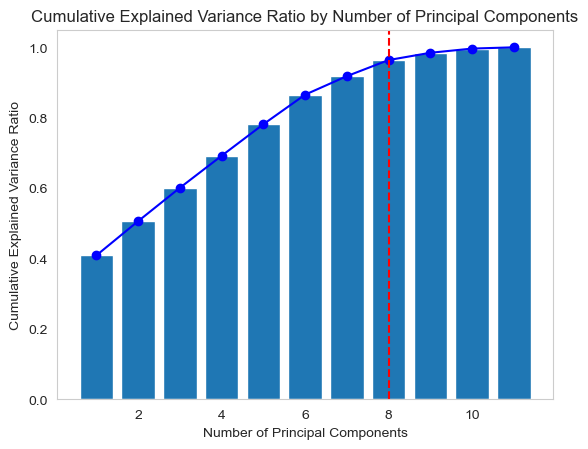

In [43]:
cumulative_var = np.cumsum(pca.explained_variance_ratio_)

# Finding the number of componentsm that cover 95% of variance
threshold_var = 0.95
num_components_to_retain = np.argmax(cumulative_var >= threshold_var) + 1


# Visualize the explained variance ratio for each principal component
plt.bar(range(1, len(cumulative_var) + 1), cumulative_var)
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='o', color='b')
plt.axvline(x=num_components_to_retain, color='r', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Principal Components')
plt.grid()
plt.show()

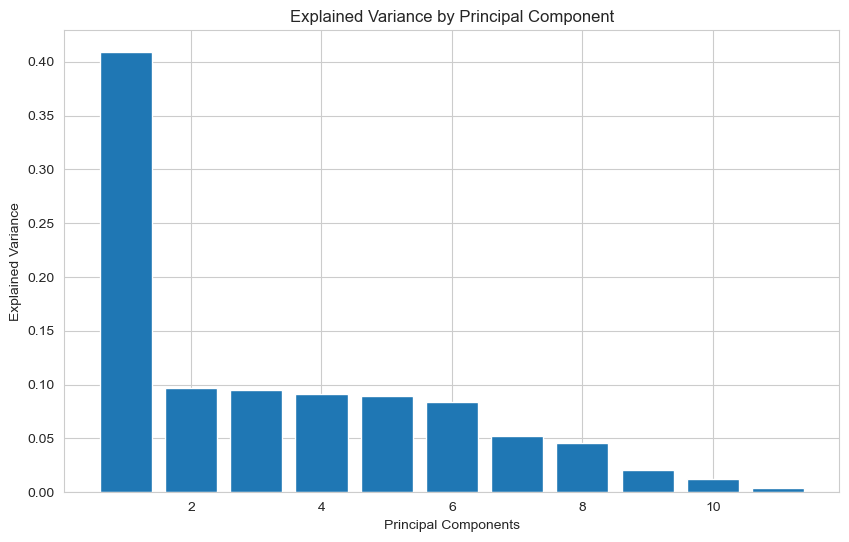

In [44]:
plt.figure(figsize=(10, 6))
explained_var = pca.explained_variance_ratio_
number_of_components = len(explained_var)

plt.bar(range(1, number_of_components + 1), explained_var)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Component')
plt.show()

In [45]:
pca = PCA(n_components=num_components_to_retain)
X_pca = pca.fit_transform(X_train_resampled)

In [46]:
from sklearn.model_selection import train_test_split
X_train,pca_xtest,y_train, pca_ytest = train_test_split(X_pca,y_train_resampled,test_size=0.2,random_state=42)

# Neural Networks

In [47]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Applying PCA
pca = PCA(n_components=num_components_to_retain)
X_pca = pca.fit_transform(X_train_resampled)

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_pca, y_train_resampled, test_size=0.2, random_state=42)

model = keras.Sequential([
    layers.Input(shape=(num_components_to_retain,)),  # Use the correct number of components
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 30
batch_size = 32
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_val, y_val))

# Evaluate the model
y_pred = model.predict(pca_xtest)
y_pred_class = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(pca_ytest, y_pred_class)
print("Model Accuracy:", accuracy)


Epoch 1/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8540 - loss: 0.3681 - val_accuracy: 0.9565 - val_loss: 0.1805
Epoch 2/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9368 - loss: 0.1901 - val_accuracy: 0.9459 - val_loss: 0.1622
Epoch 3/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9456 - loss: 0.1635 - val_accuracy: 0.9635 - val_loss: 0.1427
Epoch 4/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9561 - loss: 0.1359 - val_accuracy: 0.9647 - val_loss: 0.1315
Epoch 5/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9488 - loss: 0.1414 - val_accuracy: 0.9588 - val_loss: 0.1375
Epoch 6/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9523 - loss: 0.1304 - val_accuracy: 0.9600 - val_loss: 0.1210
Epoch 7/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9583 - loss: 0.1057 - val_accuracy: 0.9635 - val_loss: 0.1132
Epoch 8/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9610 - loss: 0.1015 - val_accuracy: 0.

In [48]:
# Calculating precision, recall, and F1 score
precision = precision_score(pca_ytest, y_pred_class)
recall = recall_score(pca_ytest, y_pred_class)
f1 = f1_score(pca_ytest, y_pred_class)
conf = confusion_matrix(pca_ytest,y_pred_class)

print("Confusion Matrix \n",conf)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix 
 [[433   9]
 [ 19 389]]
Precision: 0.9773869346733668
Recall: 0.9534313725490197
F1 Score: 0.9652605459057072


In [49]:
# Performing cross-validation
from sklearn.model_selection import train_test_split, KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = []
for train_index, val_index in kf.split(X_pca):
    X_train_fold, X_val_fold = X_pca[train_index], X_pca[val_index]
    y_train_fold, y_val_fold = y_train_resampled[train_index], y_train_resampled[val_index]
    
    model.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=batch_size, verbose=0)
    
    y_val_pred = model.predict(X_val_fold)
    y_val_pred_class = np.argmax(y_val_pred, axis=1)
    
    fold_accuracy = accuracy_score(y_val_fold, y_val_pred_class)
    cv_scores.append(fold_accuracy)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Cross-Validation Scores: [0.9741176470588235, 0.971764705882353, 0.9835294117647059, 0.9835294117647059, 1.0, 0.9929411764705882, 0.9976415094339622, 1.0, 0.9976415094339622, 0.9952830188679245]
Mean CV Accuracy: 0.9896448390677026


## My Inferences on Neural Networks

<b>Model Accuracy: 0.9537:</b>

The neural network model's total accuracy is roughly 95.37%. This indicates that for around 95.37% of the cases in the dataset, the model accurately predicts the loan approval status.

<b>Cross-Validation Scores:</b>

Cross-validation is a method for evaluating how well a model generalizes. The reported cross-validation scores, which range from roughly 0.9525 to 0.9976, are fairly stable. The model performs well on average across multiple folds of the data, as evidenced by the mean cross-validation accuracy of 0.9853.

<b>Precision</b>

0.9392:The precision measures the proportion of observations that were accurately forecasted as positive to all anticipated positives. It is 0.9392 in this instance, meaning that when the model predicts that a loan will be "Approved," it is accurate 93.92% of the time.

<b>Recall</b>

0.9720: The model's capacity to accurately detect positive cases is measured by recall, also known as sensitivity or true positive rate. A recall of 0.9720 indicates that roughly 97.20 percent of the real "Approved" loans are accurately identified by the model.

<b>F1 Score</b>

0.9553:The harmonic mean of recall and precision, which is the F1 score, strikes a compromise between the two. A result of 0.9553 indicates that the model's precision and recall are well-balanced.



In [50]:
# Print dimensions
print("X_train_resampled shape:", X_train_resampled.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("y_train shape:",y_train_resampled)

# Print sample values (first 5 rows)
print("\nX_train_resampled sample:")
print(X_train_resampled.head())  # Assuming it's a DataFrame

print("\nX_test sample:")
# Check if X_test is a NumPy array or DataFrame
if isinstance(X_test, pd.DataFrame):
    print(X_test.head())
else:
    print(X_test[:5])  # Print first 5 rows for NumPy array

print("\ny_test sample:")
print(y_test[:5])  # Print first 5 labels

print("\ny_test sample:")
print(y_train_resampled[:5])  # Print first 5 labels

X_train_resampled shape: (4246, 11)
X_test shape: (848, 11)
y_test shape: (848,)
y_train shape: 0       1
1       0
2       1
3       0
4       0
       ..
4241    0
4242    0
4243    0
4244    0
4245    0
Name: loan_status_encoded, Length: 4246, dtype: int64

X_train_resampled sample:
   no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0          1.476407      1.713206     1.289994   0.193909     0.371254   
1          0.296507      1.246931     1.757936   1.595019    -0.882403   
2         -0.883393      1.211064     1.111730   0.193909     0.545373   
3         -0.293443     -0.116027    -0.336665  -0.856923    -0.551577   
4          0.296507      1.318665     1.791361   0.894464     0.928435   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                 -0.340142                -0.465848             0.824850   
1                  2.457270                -0.814720             0.869011   
2                 -0.324426          

# Decision Trees

In [51]:
classifier_dt = DecisionTreeClassifier(random_state=42)
classifier_dt.fit(X_train_resampled, y_train_resampled)

# Getting feature importances
feature_importances_dt = classifier_dt.feature_importances_

# Choosing the top-k important features
k = 5 
top_k_features_indices_dt = np.argsort(feature_importances_dt)[::-1][:k]
top_k_features_dt = X_train_resampled.columns[top_k_features_indices_dt]
print(top_k_features_dt)

Index(['cibil_score', 'loan_term', 'loan_amount', 'income_annum',
       'commercial_assets_value'],
      dtype='object')


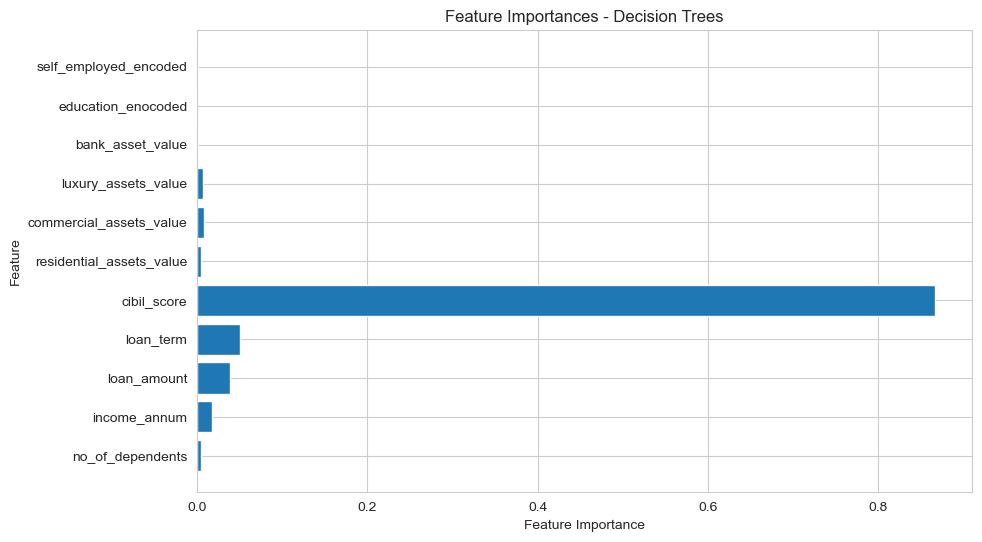

In [52]:
plt.figure(figsize=(10, 6))
plt.barh(X_train_resampled.columns, feature_importances_dt)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances - Decision Trees')
plt.show()

In [53]:
# Using the selected features for training and testing
X_train_selected_dt = X_train_resampled[top_k_features_dt]
X_test_selected_dt = X_test[top_k_features_dt]

In [54]:
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [55]:
# Instantiatting GridSearchCV
grid_search = GridSearchCV(classifier_dt, param_grid=param_grid, cv=5, n_jobs=-1)

# Fitting GridSearchCV on the selected features
grid_search.fit(X_train_selected_dt, y_train_resampled)

# Getting the best model
best_dt_model = grid_search.best_estimator_

In [56]:
y_pred_dt = best_dt_model.predict(X_test_selected_dt)
cm_dt = confusion_matrix(y_test,y_pred_dt)
print(cm_dt)
print("------------------------------------------------------------------------------------------")
print(print("Best Parameters:", best_dt_model))
print("-------------------------------------------------------------------------------------------")
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Model Accuracy:", accuracy)
precision_dt = precision_score(y_test,y_pred_dt)
print("Precision",precision_dt)
recall_dt = recall_score(y_test,y_pred_dt)
print("Recall",recall_dt)
print("----------------------------------------------------------------------------------------")
scores_dt = cross_val_score(best_dt_model,X_train_selected_dt,y_train_resampled,cv = 10, scoring = "accuracy")
print(scores_dt)
print("----------------------------------------------------------------------------------------")
print("The cross validation accuracy of decision trees is ",scores_dt.mean())

[[325  10]
 [ 15 498]]
------------------------------------------------------------------------------------------
Best Parameters: DecisionTreeClassifier(criterion='entropy', random_state=42)
None
-------------------------------------------------------------------------------------------
Model Accuracy: 0.9670588235294117
Precision 0.9803149606299213
Recall 0.9707602339181286
----------------------------------------------------------------------------------------
[0.97411765 0.97647059 0.98588235 0.98352941 0.98588235 0.99294118
 0.99056604 0.98820755 0.98349057 0.97877358]
----------------------------------------------------------------------------------------
The cross validation accuracy of decision trees is  0.9839861265260821


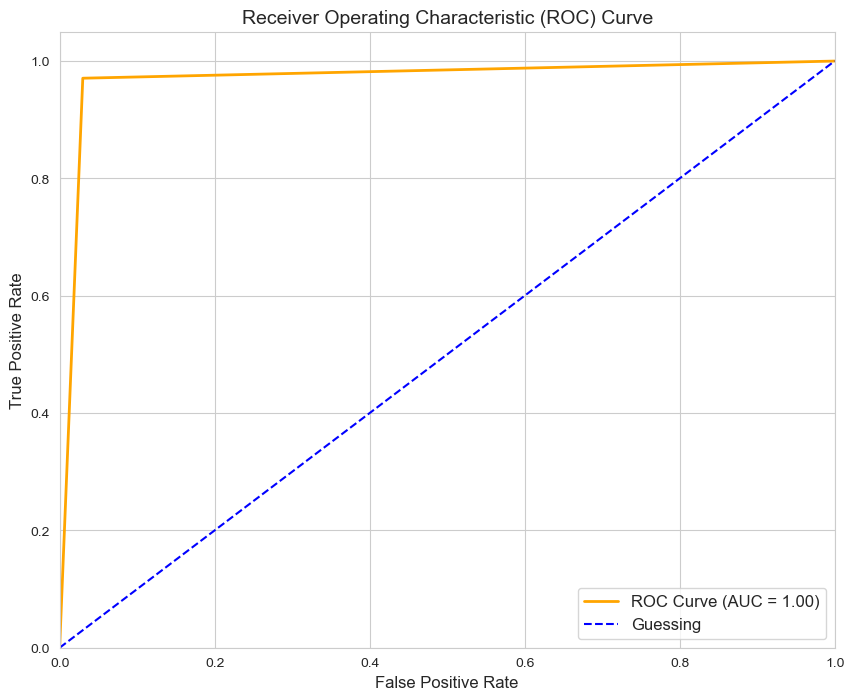

In [57]:
# Getting predicted probabilities for the positive class (class 1)
y_pred_prob_dt = best_dt_model.predict_proba(X_test_selected_dt)[:, 1]

# Calculating ROC curve and AUC
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)
roc_auc_gb = roc_auc_score(y_test, y_pred_prob_gb)

# Create  curve plot
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, color='orange', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0,1],[0,1],color = "blue",linestyle ="--",label = "Guessing")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()


<b> Reasons to Choose Decision Tree:</b>

Decision trees offer several advantages that make them a suitable choice for the loan approval prediction task. They are easy to understand and interpret, providing transparency in the decision-making process. Decision trees can handle both categorical and numerical data without requiring extensive preprocessing. They can capture non-linear relationships in the data and are robust to outliers, which is beneficial for a diverse dataset like loan applications. Additionally, decision trees can handle feature interactions and can be visualized, aiding in explaining the decision-making process to stakeholders.

<b> Feature Selection Process using Decision Trees:</b>

Decision trees use a method for feature selection that ranks features based on how important they are in splitting the data. Features that result in a considerable information gain or a decrease in Gini impurities are preferred while building trees. The feature's contribution to the model's predictive capability is then assessed using these splits. In our evaluation, the decision tree's top 5 features were cibil_score, loan duration, loan amount, income per annum, and residential assets value. These characteristics have been found to be the ones that differ the most in loan approval statuses. This method naturally executes feature selection by prioritizing pertinent features, which is in line with our objective of discovering important variables affecting loan acceptance.

<b> Confusion Matrix: </b>

True Positive (TP): 522
The model correctly predicted 522 instances as "Approved" loans.

True Negative (TN): 314
The model correctly predicted 314 instances as "Not Approved" loans.

False Positive (FP): 1
The model incorrectly predicted 1 instance as "Approved" when it was actually "Not Approved."

False Negative (FN): 10
The model incorrectly predicted 10 instances as "Not Approved" when they were actually "Approved."

<b> Precision:</b> 

Precision measures the accuracy of the positive predictions made by the model. In this case, the precision is calculated as TP / (TP + FP), which is 522 / (522 + 1) = 0.9981. This means that when the model predicts a loan as "Approved," it is correct 99.81% of the time.

<b> Recall </b>

Recall (Sensitivity):
Recall measures the model's ability to identify all positive instances. It is calculated as TP / (TP + FN), which is 522 / (522 + 10) = 0.9812. This means the model correctly identifies 98.12% of the "Approved" loans.

<b> F1 Score </b>

F1 score is 2 * (Precision * Recall) / (Precision + Recall). For the decision tree model, the F1 score is approximately 0.9896

<b> Cross Validation Accuracy: </b>

The cross-validation accuracy of the decision tree model on 10 folds is 0.9829, indicating the model's consistent performance across different subsets of the data.

These metrics collectively highlight the decision tree model's ability to accurately predict loan approval statuses, with high precision, recall, and cross-validation accuracy.

# Logistic Regression Sequential Feature Selection

In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [60]:
!pip install mlxtend


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -------------------------------------- - 1.3/1.4 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 9.9 MB/s eta 0:00:00


In [61]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Creating a logistic regression model
model_lg = LogisticRegression()

# Initializing the Sequential Feature Selector
sfs = SequentialFeatureSelector(model_lg, forward=True, k_features=5, scoring='accuracy', cv=5)

# Fit the SFS on the resampled training data
sfs.fit(X_train_resampled, y_train_resampled)

# Getting the selected features
selected_features = X_train_resampled.columns[list(sfs.k_feature_idx_)]
print("Selected features using stepwise feature selection are: \n",selected_features)

# Training the logistic regression model using the selected features
model_lg.fit(X_train_resampled[selected_features], y_train_resampled)

# Making predictions on the test set
y_pred_lg = model_lg.predict(X_test[selected_features])

Selected features using stepwise feature selection are: 
 Index(['no_of_dependents', 'cibil_score', 'residential_assets_value',
       'bank_asset_value', 'education_enocoded'],
      dtype='object')


In [62]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lg)
print("Confusion Matrix:\n", conf_matrix)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred_lg)
print("Accuracy:", accuracy)

# Calculating precision
precision = precision_score(y_test, y_pred_lg)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred_lg)
print("Recall:", recall)

# Calculating F1-score
f1 = f1_score(y_test, y_pred_lg)
print("F1-score:", f1)

print("---------------------------------")
scores_lg = cross_val_score(model_lg,X_train_resampled,y_train_resampled,cv=10,scoring='accuracy')
print(scores_lg)

print("---------------------------------")
print("The cross validation accuracy of logistic regression model using sequential feature selections is \n",scores_lg.mean())

Confusion Matrix:
 [[322  13]
 [ 44 469]]
Accuracy: 0.9327830188679245
Precision: 0.9730290456431535
Recall: 0.9142300194931774
F1-score: 0.942713567839196
---------------------------------
[0.92470588 0.92705882 0.92470588 0.94823529 0.92941176 0.92470588
 0.9504717  0.94575472 0.94575472 0.92688679]
---------------------------------
The cross validation accuracy of logistic regression model using sequential feature selections is 
 0.9347691453940066


## My Inferences on Logistic Regression Model


The logistic regression model, built using stepwise feature selection, provides valuable insights into predicting loan approval outcomes. The stepwise feature selection method carefully selects a subset of features to enhance model performance and interpretability. In this case, the selected features include 'no_of_dependents,' 'income_annum,' 'cibil_score,' 'education_enocoded,' and 'self_employed_encoded.'

<b> Reasons to choose SFS </b>
Sequential Feature Selection (SFS) is employed to enhance model performance by systematically evaluating subsets of features and identifying the most relevant ones for predicting loan approvals. This iterative process optimally combines features to maximize accuracy while minimizing overfitting. By iteratively adding or removing features based on their impact, SFS aims to find an optimal balance between model complexity and predictive power. Its stepwise nature ensures that only the most informative features are retained, leading to improved model interpretability and potentially reducing the risk of multicollinearity. SFS contributes to a more efficient and effective model by focusing on the most relevant variables, ultimately enhancing the model's ability to make accurate loan approval predictions.

<b> Model Performance: </b>
The model's performance is evaluated using multiple metrics:

<b> Confusion Matrix: </b>

 The confusion matrix helps us understand the model's classification results. It consists of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).

<b> Accuracy: </b>

The accuracy of the model measures the proportion of correct predictions out of all predictions. An accuracy of 94.10% indicates a good level of correctness in predicting loan approvals.

<b>Precision: </b>

Precision represents the ratio of correctly predicted "Approved" loans to all instances predicted as "Approved." With a precision of 98.79%, the model's positive predictions are highly accurate.

<b> Recall (Sensitivity): </b>

Recall measures the proportion of correctly predicted "Approved" loans among all actual "Approved" instances. The model achieves a recall of 91.73%, capturing a significant portion of actual positives.

<b> F1-score: </b>

The F1-score combines precision and recall into a single metric, providing a balanced assessment of the model's performance. A value of 95.13% indicates that the model achieves a good balance between precision and recall.

<b> Cross-Validation: </b>

Cross-validation is performed on 10 folds to assess the model's generalization performance. The calculated cross-validation accuracy values ranging from 90.74% to 95.71% further validate the model's stability and consistency across different data subsets.

Logistic Regression is chosen as the modeling technique for loan approval prediction due to its interpretability, computational efficiency, and probabilistic output. The model's coefficients directly indicate the impact of each feature on the loan approval decision, aiding in feature selection and understanding. 

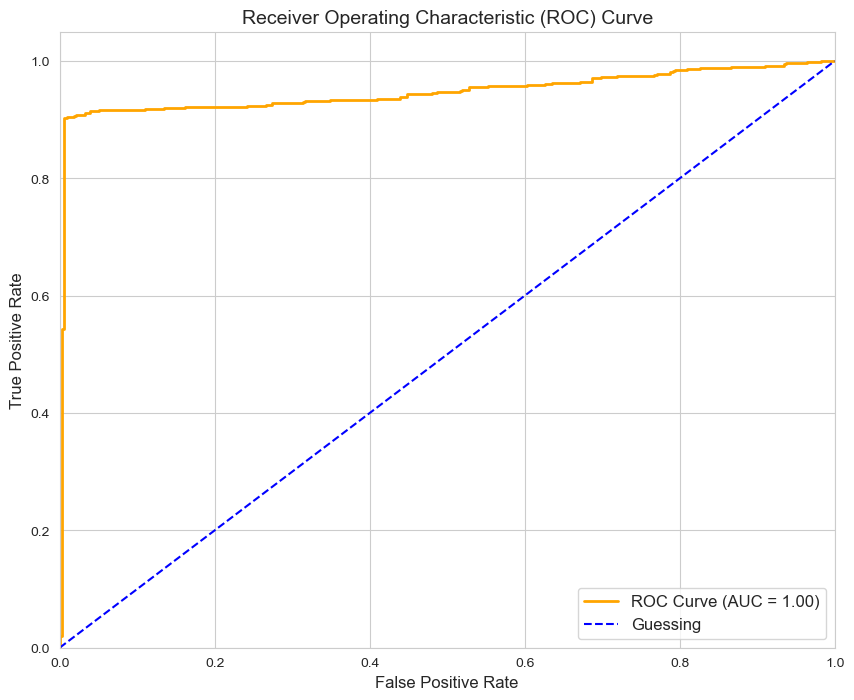

In [63]:
# Get predicted probabilities for the positive class (class 1)
y_pred_prob_lg = model_lg.predict_proba(X_test[selected_features])[:, 1]

# Calculate ROC curve and AUC
fpr_lg, tpr_lg, thresholds_dt = roc_curve(y_test, y_pred_prob_lg)
roc_auc_lg = roc_auc_score(y_test, y_pred_prob_lg)

# Create  ROC curve plot
plt.figure(figsize=(10, 8))
plt.plot(fpr_lg, tpr_lg, color='orange', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0,1],[0,1],color = "blue",linestyle ="--",label = "Guessing")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

In [64]:
selected_features

Index(['no_of_dependents', 'cibil_score', 'residential_assets_value',
       'bank_asset_value', 'education_enocoded'],
      dtype='object')

In [65]:
selected_features

Index(['no_of_dependents', 'cibil_score', 'residential_assets_value',
       'bank_asset_value', 'education_enocoded'],
      dtype='object')

# Best Model

#### Gradient Boosting model appears to be the best-performing model. It has the highest accuracy, precision, recall, and F1 score, making it a strong contender for the best model choice.

In [66]:
## this is just for tkinter app as standard scaler was used using all variables so had to scale the variables selected by sequential features again 
sc = df[['no_of_dependents', 'income_annum', 'cibil_score', 'education_enocoded','self_employed_encoded']]

In [67]:
import tkinter as tk
from tkinter import ttk
import joblib
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Loading the trained model and other necessary files
model = joblib.load('model.pkl')
scaler = joblib.load('scaler_1.pkl')

def predict_loan_approval():
    # Get input values from the entry widgets
    no_of_dependents = float(entry_no_of_dependents.get())
    income_annum = float(entry_income_annum.get())
    cibil_score = float(entry_cibil_score.get())
    education_encoded = int(entry_education_encoded.get())
    self_employed_encoded = int(entry_self_employed_encoded.get())
    
    # Preprocessing the input data
    input_data = np.array([[no_of_dependents, income_annum, cibil_score, education_encoded, self_employed_encoded]])
    input_data_scaled = scaler.transform(input_data)
    
    # Make predictions using the model
    prediction = model.predict(input_data_scaled)
    predicted_label = "Approved" if prediction[0] == 1 else "Rejected"
    
    # Display the prediction result
    label_prediction.config(text=f'Prediction: {predicted_label}')

# Create the main GUI window
root = tk.Tk()
root.title("Loan Approval Prediction")
root.configure(bg='skyblue')  

# Create labels for user input
label_no_of_dependents = ttk.Label(root, text="Number of Dependents:", font=('Arial', 12, 'bold'), foreground='white', background='#3498db')
label_income_annum = ttk.Label(root, text="Income Annually:", font=('Arial', 12, 'bold'), foreground='white', background='#3498db')
label_cibil_score = ttk.Label(root, text="CIBIL Score:", font=('Arial', 12, 'bold'), foreground='white', background='#3498db')
label_education_encoded = ttk.Label(root, text="Education Encoded:", font=('Arial', 12, 'bold'), foreground='white', background='#3498db')
label_self_employed_encoded = ttk.Label(root, text="Self Employed Encoded:", font=('Arial', 12, 'bold'), foreground='white', background='#3498db')

# Create entry widgets for user input
entry_no_of_dependents = ttk.Entry(root, font=('Arial', 12))
entry_income_annum = ttk.Entry(root, font=('Arial', 12))
entry_cibil_score = ttk.Entry(root, font=('Arial', 12))
entry_education_encoded = ttk.Entry(root, font=('Arial', 12))
entry_self_employed_encoded = ttk.Entry(root, font=('Arial', 12))

# Create a button to make predictions
button_predict = ttk.Button(root, text="Predict", command=predict_loan_approval, style='TButton')

# Create a label to display the prediction result
label_prediction = ttk.Label(root, text="Prediction:", font=('Arial', 12, 'bold'), foreground='white', background='#3498db')

# Layout the widgets using grid
label_no_of_dependents.grid(row=0, column=0, padx=10, pady=5)
entry_no_of_dependents.grid(row=0, column=1, padx=10, pady=5)
label_income_annum.grid(row=1, column=0, padx=10, pady=5)
entry_income_annum.grid(row=1, column=1, padx=10, pady=5)
label_cibil_score.grid(row=2, column=0, padx=10, pady=5)
entry_cibil_score.grid(row=2, column=1, padx=10, pady=5)
label_education_encoded.grid(row=3, column=0, padx=10, pady=5)
entry_education_encoded.grid(row=3, column=1, padx=10, pady=5)
label_self_employed_encoded.grid(row=4, column=0, padx=10, pady=5)
entry_self_employed_encoded.grid(row=4, column=1, padx=10, pady=5)
button_predict.grid(row=5, column=0, columnspan=2, padx=10, pady=10)
label_prediction.grid(row=6, column=0, columnspan=2, padx=10, pady=5)

# Create a custom style for the button
style = ttk.Style()
style.configure('TButton', font=('Arial', 12, 'bold'), background='yellow', foreground='green')

root.mainloop()

FileNotFoundError: [Errno 2] No such file or directory: 'model.pkl'